In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

In [2]:
t=pd.read_csv('titanic_train.csv')
ship=pd.DataFrame(t)
ship.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
ship.drop(['Name','PassengerId','Ticket','Cabin'],axis=1,inplace=True)

In [4]:
ship.shape

(891, 8)

In [5]:
ship.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [6]:
ship.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object

In [7]:
ship.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [8]:
from sklearn.preprocessing import Imputer
imp=Imputer(missing_values='NaN',strategy='mean')
ship['Age']=imp.fit_transform(ship['Age'].values.reshape(-1,1))

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [9]:
ship=ship.dropna()
ship.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [10]:
ship.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [11]:
from sklearn.preprocessing import LabelEncoder

In [12]:
le=LabelEncoder()
list=['Pclass','Sex','Embarked']
for val in list:
    ship[val]=le.fit_transform(ship[val].astype(str))

In [13]:
ship.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,2,1,22.0,1,0,7.2500,2
1,1,0,0,38.0,1,0,71.2833,0
2,1,2,0,26.0,0,0,7.9250,2
3,1,0,0,35.0,1,0,53.1000,2
4,0,2,1,35.0,0,0,8.0500,2


In [14]:
ship['Parch'].value_counts()

0    676
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

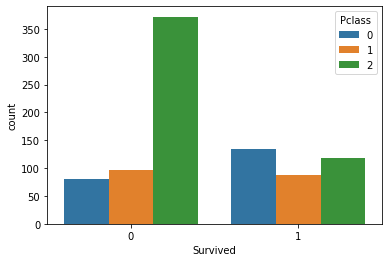

In [15]:
sns.countplot(x='Survived',hue='Pclass',data=ship)

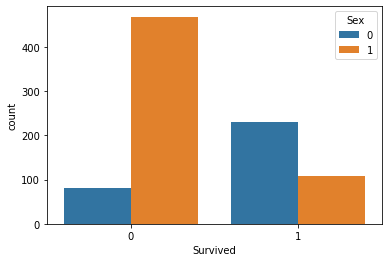

In [16]:
sns.countplot(x='Survived',hue='Sex',data=ship)

In [17]:
ship.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,0.382452,1.311586,0.649044,29.653446,0.524184,0.382452,32.096681,1.535433
std,0.486260,0.834700,0.477538,12.968366,1.103705,0.806761,49.697504,0.792088
min,0.000000,0.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,22.000000,0.000000,0.000000,7.895800,1.000000
50%,0.000000,2.000000,1.000000,29.699118,0.000000,0.000000,14.454200,2.000000
75%,1.000000,2.000000,1.000000,35.000000,1.000000,0.000000,31.000000,2.000000
max,1.000000,2.000000,1.000000,80.000000,8.000000,6.000000,512.329200,2.000000


In [18]:
shipcor=ship.corr()

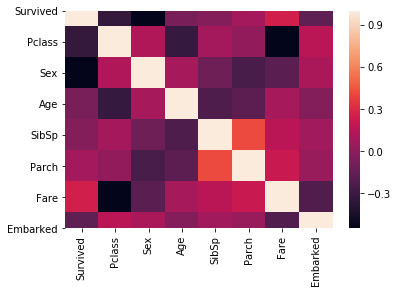

In [19]:
sns.heatmap(shipcor)

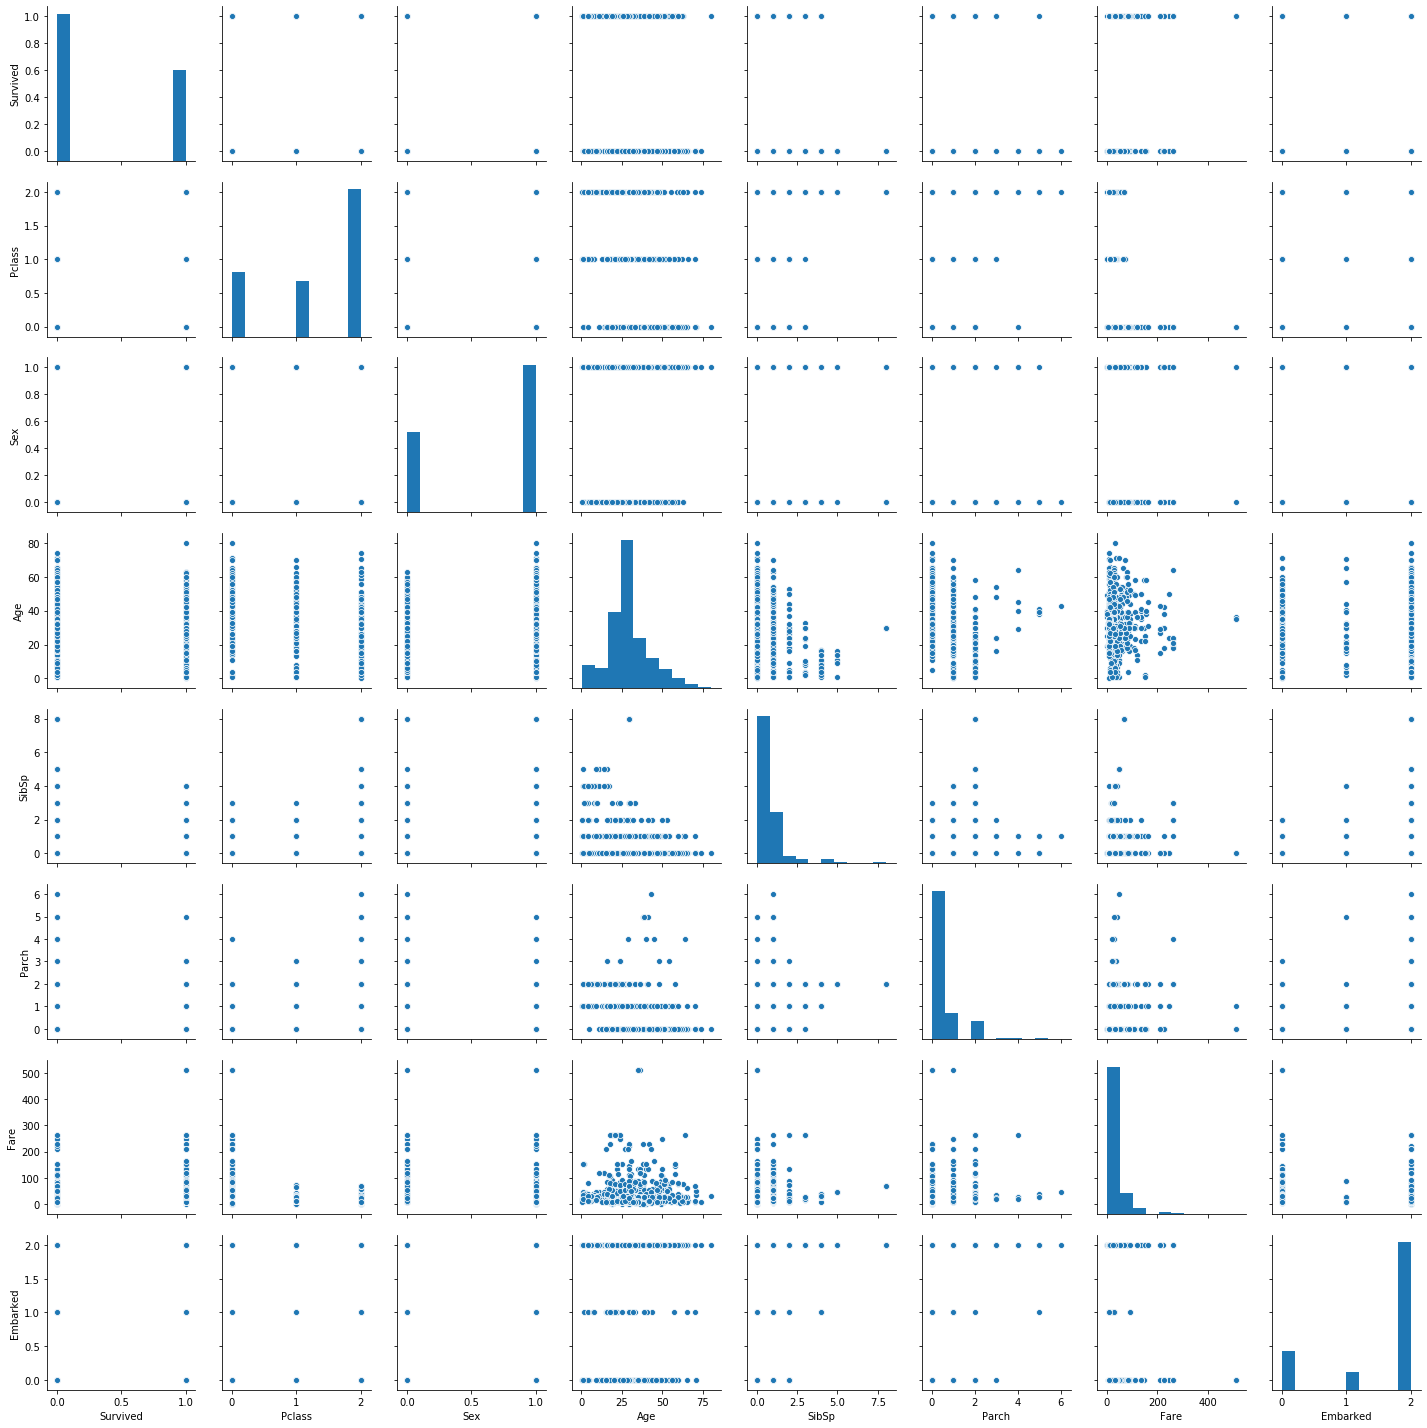

In [20]:
sns.pairplot(ship)

In [21]:
x=ship.iloc[:,1:]
y=ship.iloc[:,:1]

In [22]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
scale.fit(x)
x=scale.transform(x)

In [23]:
def r_score(alg,x,y):
    r_score=0
    for r_state in range(42,101):
        x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=r_state)
        alg.fit(x_train,y_train)
        pred=alg.predict(x_test)
        accuracy=accuracy_score(y_test,pred)
        if accuracy > r_score:
            r_score=accuracy
            final_r=r_state 
    print(accuracy,final_r)

In [24]:
from sklearn.linear_model import LogisticRegression,Lasso,Ridge
lr=LogisticRegression()

In [25]:
import warnings
warnings.filterwarnings('ignore')
r_score(lr,x,y)

0.7789115646258503 43


In [26]:
lrscore=cross_val_score(lr,x,y,cv=5)
print(lrscore.mean())
print(lrscore.std())

0.7840601790135213
0.016516137104961356


In [27]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=43)
lr.fit(x_train,y_train)
predlr=lr.predict(x_test)
print(accuracy_score(y_test,predlr))
print(confusion_matrix(y_test,predlr))
print(classification_report(y_test,predlr))

0.8299319727891157
[[162  19]
 [ 31  82]]
              precision    recall  f1-score   support

           0       0.84      0.90      0.87       181
           1       0.81      0.73      0.77       113

    accuracy                           0.83       294
   macro avg       0.83      0.81      0.82       294
weighted avg       0.83      0.83      0.83       294



In [28]:
l=Lasso()
alphavalue={'alpha':[1,0.1,0.01,0.001,0]}
Grd=GridSearchCV(estimator=l,param_grid=alphavalue)

In [29]:
Grd.fit(x_train,y_train)
print(Grd.best_score_)
print(Grd.best_params_)

0.34491057529568825
{'alpha': 0.01}


In [30]:
ls=Lasso(alpha=0.01)
ls.fit(x_train,y_train)
ls.score(x_train,y_train)

0.3550668028286862

In [31]:
r=Ridge()
alphavalue={'alpha':[1,0.1,0.01,0.001,0]}
grd=GridSearchCV(estimator=r,param_grid=alphavalue)
grd.fit(x_train,y_train)
print(grd.best_score_)
print(grd.best_params_)

0.34401274136211635
{'alpha': 1}


In [32]:
rd=Ridge(alpha=1)
rd.fit(x_train,y_train)
rd.score(x_train,y_train)

0.35808154172597917

In [33]:
from sklearn.metrics import roc_curve,roc_auc_score
y_pred_prob=lr.predict_proba(x_test)[:,1]

In [34]:
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)

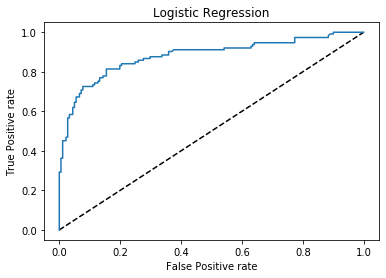

In [35]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr)
plt.xlabel('False Positive rate')
plt.ylabel('True Positive rate')
plt.title('Logistic Regression')
plt.show()

In [36]:
auc_score=roc_auc_score(y_test,predlr)
auc_score

0.8103456705617758

In [37]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
r_score(dtc,x,y)

0.7755102040816326 88


In [38]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=88)
dtc.fit(x_train,y_train)
preddt=dtc.predict(x_test)
print(accuracy_score(y_test,preddt))
print(confusion_matrix(y_test,preddt))
print(classification_report(y_test,preddt))

0.8197278911564626
[[146  30]
 [ 23  95]]
              precision    recall  f1-score   support

           0       0.86      0.83      0.85       176
           1       0.76      0.81      0.78       118

    accuracy                           0.82       294
   macro avg       0.81      0.82      0.81       294
weighted avg       0.82      0.82      0.82       294



In [39]:
dtcscore=cross_val_score(dtc,x,y,cv=5)
print(dtcscore.mean())
print(dtcscore.std())

0.7683044499460421
0.018981619861888534


In [40]:
y_pred_prob=dtc.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)

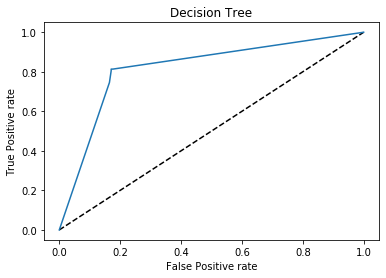

In [41]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr)
plt.xlabel('False Positive rate')
plt.ylabel('True Positive rate')
plt.title('Decision Tree')
plt.show()

In [42]:
auc_score=roc_auc_score(y_test,preddt)
print(auc_score)

0.8173151001540833


In [43]:
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()

In [44]:
r_score(gnb,x,y)

0.7993197278911565 94


In [45]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=94)
gnb.fit(x_train,y_train)
predgnb=gnb.predict(x_test)

In [46]:
print(accuracy_score(y_test,predgnb))
print(confusion_matrix(y_test,predgnb))
print(classification_report(y_test,predgnb))

0.8299319727891157
[[161  21]
 [ 29  83]]
              precision    recall  f1-score   support

           0       0.85      0.88      0.87       182
           1       0.80      0.74      0.77       112

    accuracy                           0.83       294
   macro avg       0.82      0.81      0.82       294
weighted avg       0.83      0.83      0.83       294



In [47]:
gnbscore=cross_val_score(gnb,x,y,cv=5)
print(gnbscore.mean())
print(gnbscore.std())

0.7907890560528154
0.012298425055066483


In [48]:
y_pred_prob=gnb.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)

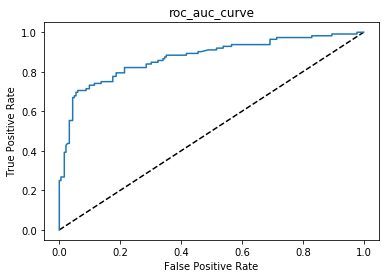

In [49]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('roc_auc_curve')
plt.show()

In [50]:
roc_score=roc_auc_score(y_test,predgnb)
roc_score

0.8128434065934066

In [51]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
neighbors={"n_neighbors":range(1,40)}
grid = GridSearchCV(knn, neighbors)
grid.fit(x,y)
grid.best_params_

{'n_neighbors': 20}

In [52]:
r_score(knn,x,y)

0.8231292517006803 81


In [53]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=71)
knn=KNeighborsClassifier(n_neighbors=20)
knn.fit(x_train,y_train)
predkn=knn.predict(x_test)
print(accuracy_score(y_test,predkn))
print(confusion_matrix(y_test,predkn))
print(classification_report(y_test,predkn))

0.8537414965986394
[[175  15]
 [ 28  76]]
              precision    recall  f1-score   support

           0       0.86      0.92      0.89       190
           1       0.84      0.73      0.78       104

    accuracy                           0.85       294
   macro avg       0.85      0.83      0.84       294
weighted avg       0.85      0.85      0.85       294



In [54]:
knnscore=cross_val_score(knn,x,y,cv=5)
print(knnscore.mean())
print(knnscore.std())

0.813305402145623
0.02149195056785969


In [55]:
y_pred_prob=knn.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)

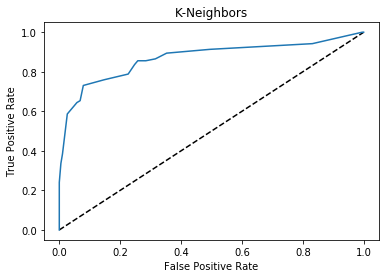

In [56]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('K-Neighbors')
plt.show()

In [57]:
roc_score=roc_auc_score(y_test,predkn)
roc_score

0.8259109311740891

In [58]:
from sklearn.svm import SVC
svm=SVC()
parameters={"kernel":["linear", "poly", "rbf"],"C":[0.001,0.01,0.1,1,10]}
grid=GridSearchCV(svm,parameters)
grid.fit(x,y)
grid.best_params_

{'C': 1, 'kernel': 'rbf'}

In [59]:
r_score(svm,x,y)

0.8231292517006803 81


In [60]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=81)
svm=SVC(kernel='rbf')
svm.fit(x_train,y_train)
predsv=svm.predict(x_test)
print(accuracy_score(y_test,predsv))
print(confusion_matrix(y_test,predsv))
print(classification_report(y_test,predsv))

0.8639455782312925
[[175  12]
 [ 28  79]]
              precision    recall  f1-score   support

           0       0.86      0.94      0.90       187
           1       0.87      0.74      0.80       107

    accuracy                           0.86       294
   macro avg       0.87      0.84      0.85       294
weighted avg       0.86      0.86      0.86       294



In [61]:
svmscore=cross_val_score(svm,x,y,cv=5)
print(svmscore.mean())
print(svmscore.std())

0.8268139402018664
0.020865419731371064


In [62]:
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier

In [63]:
rf=RandomForestClassifier()
parameters={'n_estimators':[10,100,500]}
gd=GridSearchCV(rf,parameters)
gd.fit(x_train,y_train)
print(gd.best_score_)
print(gd.best_params_)

0.7596638655462185
{'n_estimators': 10}


In [64]:
r_score(rf,x,y)

0.7857142857142857 76


In [65]:
rf=RandomForestClassifier(n_estimators=10)
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)

In [66]:
print(accuracy_score(y_test,predsv))
print(confusion_matrix(y_test,predsv))
print(classification_report(y_test,predsv))

0.8639455782312925
[[175  12]
 [ 28  79]]
              precision    recall  f1-score   support

           0       0.86      0.94      0.90       187
           1       0.87      0.74      0.80       107

    accuracy                           0.86       294
   macro avg       0.87      0.84      0.85       294
weighted avg       0.86      0.86      0.86       294



In [67]:
rfscore=cross_val_score(rf,x,y,cv=5)
print(rfscore.mean())
print(rfscore.std())

0.7795721449882562
0.04021646064763883


In [68]:
parameters={"learning_rate":[0.001,0.01,0.1,1],"n_estimators":[10,100,500,1000]}
gbc=GradientBoostingClassifier()
grid=GridSearchCV(gbc, parameters)
grid.fit(x,y)
grid.best_params_

{'learning_rate': 0.001, 'n_estimators': 1000}

In [69]:
gbc=GradientBoostingClassifier(learning_rate=0.001,n_estimators=1000)
r_score(gbc,x,y)

0.7721088435374149 71


From the above scores we can choose SVM as there we are achieving highest score with random state 81

In [70]:
svm=SVC(kernel='rbf',probability=True)
svm.fit(x_train,y_train)
predsv=svm.predict(x_test)
print(accuracy_score(y_test,predsv))
print(confusion_matrix(y_test,predsv))
print(classification_report(y_test,predsv))

0.8639455782312925
[[175  12]
 [ 28  79]]
              precision    recall  f1-score   support

           0       0.86      0.94      0.90       187
           1       0.87      0.74      0.80       107

    accuracy                           0.86       294
   macro avg       0.87      0.84      0.85       294
weighted avg       0.86      0.86      0.86       294



In [71]:
svmscore=cross_val_score(svm,x,y,cv=5)
print(svmscore.mean())
print(svmscore.std())

0.8268139402018664
0.020865419731371064


In [72]:
y_pred_prob=svm.predict_proba(x_test)[:,1]

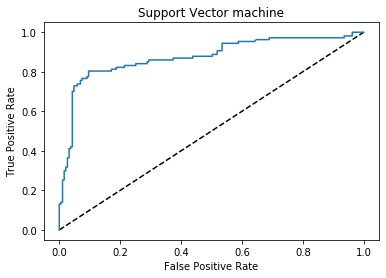

In [73]:
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Support Vector machine')
plt.show()

In [74]:
auc_score=roc_auc_score(y_test,predsv)
print(auc_score)

0.8370733170073467


In [75]:
from sklearn.externals import joblib
joblib.dump(svm,'titanic_svm.pkl')

['titanic_svm.pkl']